In [1]:
#Assignment 3, Creating a visualization based upon Ferreira et al, 2014

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
df.T.describe()

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044


In [3]:
mean = df.mean(axis = 1)
stds = df.std(axis = 1)
yerr = stds / np.sqrt(df.shape[1]) * stats.norm.ppf(0.975)
conf_ints = [stats.norm.interval(0.95, loc=mu, scale=SE) for mu, SE in zip(mean, stds/np.sqrt(df.shape[1]))]

In [4]:
#function for computing probability that mean > y
def prob_mean_over_y(y, c_interval):
    if y < np.min(c_interval):
        prob = 1.0
    elif y > np.max(c_interval):
        prob = 0.0
    else:
        prob = (np.max(c_interval) - y) / (np.max(c_interval) - np.min(c_interval))
    
    return prob

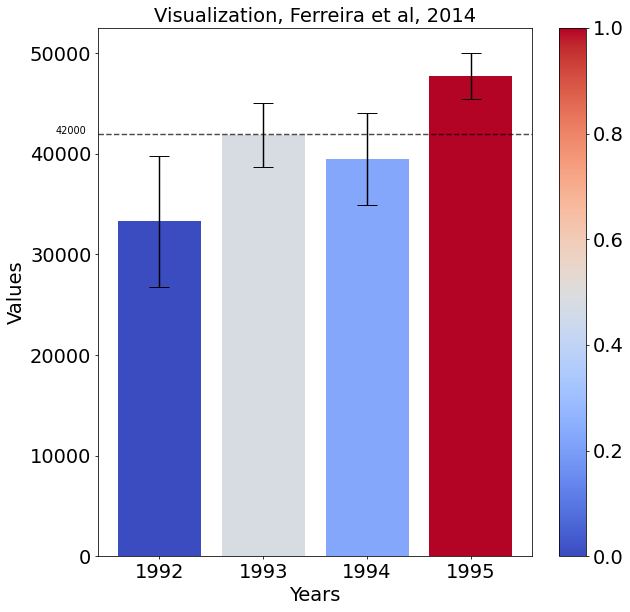

In [35]:
y = 42000
probs = [prob_mean_over_y(y, c_interval) for c_interval in conf_ints]

import matplotlib.cm as cm
import matplotlib.colors as colors

plt.figure(figsize = (10, 10), dpi = 70)

# Colormap
cmap = cm.get_cmap('coolwarm')
cpick = cm.ScalarMappable(cmap=cmap, norm=colors.Normalize(vmin=0, vmax=1.0))
cpick.set_array([])
plt.axhline(y = y, color = 'black', alpha = 0.7, linestyle = "dashed")

plt.bar(range(df.shape[0]), mean, yerr=yerr, color=cpick.to_rgba(probs), capsize=10)

# Setting plot details
plt.title('Visualization, Ferreira et al, 2014', fontsize = 20)
plt.xticks(range(len(df.T.columns)), df.T.columns)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('Years', fontsize = 20)
plt.ylabel('Values', fontsize = 20)
plt.annotate('42000', xy = (0, 42000),  xytext = (-1, 42000))
cbar = plt.colorbar(cpick, orientation = "vertical")
cbar.ax.tick_params(labelsize = 20)
plt.savefig('file.jpeg', edgecolor = 'black', dpi = 400, transparent=True)